In [1]:
from mnist import MNIST
import numpy as np
import pandas as pd
import random
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

mndata = MNIST('mnist')

# loading datasets
x_train, y_train = mndata.load_training()
x_test, y_test = mndata.load_testing()

y_train = pd.DataFrame(data = y_train)
x_train = pd.DataFrame(data = x_train)

In [6]:
# x_train = x_train[:1000]
# x_test = x_test[:1000]
y_train = y_train[:1000]
y_test = y_test[:1000]

In [3]:
distanceMatrix = pd.DataFrame(data= (euclidean_distances(x_train, x_test)))
distanceMatrix.insert(0,column="labelTarget", value = y_train)
distanceMatrix[:10]

,labelTarget,0,1,2,3,4,5,6,7,8,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,5,2395.795692,2851.663550,2352.060373,2558.021697,2701.184925,2397.768546,2649.856034,2551.902624,2516.062599,...,2285.383775,2709.163524,2721.190365,3199.106907,2413.004766,2572.237936,2359.398016,2627.563510,2693.475450,2944.139942
1,0,2650.630302,2920.014555,2569.452082,1980.683973,2795.974249,2669.899998,2993.549899,2866.932681,2769.738796,...,2818.336921,3000.700085,2479.949798,2417.633347,2668.459106,3052.619858,2716.290301,2928.585665,2660.976137,2512.646016
2,4,2407.308248,2972.515265,2334.061696,3022.716493,1971.105781,2510.786331,2439.935860,2456.326729,2736.544354,...,2939.741655,3179.244722,2367.799611,3570.316933,2645.248193,3232.504292,2972.965691,2678.815783,2808.100782,3202.117737
3,1,2556.609669,2766.094901,1672.449700,3098.380061,2542.250578,1577.589300,2623.796295,2411.968283,2700.993706,...,2345.637014,2885.992204,2790.480066,3215.184132,1622.410552,2654.883802,2937.524638,2303.337144,2467.681908,3178.422879
4,9,2345.209159,2941.847039,2295.259680,2710.314742,2472.842292,2279.611590,2145.896549,2241.272406,2639.525336,...,2144.924241,2818.662094,1996.173840,3065.348594,2394.232027,2923.733401,3051.564517,2016.552256,2393.628000,2969.629438
5,2,2468.432499,2948.650708,2516.903256,2622.204607,2545.187616,2509.121360,2738.355528,2458.108826,2767.929732,...,2296.104309,2814.095414,2396.520186,3006.275270,2507.917861,2733.757853,2860.873468,2302.705365,2550.492894,2731.607585
6,1,2377.465037,2586.573022,1951.993084,2808.816833,2449.291938,2009.245878,2329.724447,2271.487618,2569.135652,...,2381.607440,2800.548875,2634.258909,3378.909587,2008.650044,2813.522525,2529.971937,2562.109092,2263.299582,2925.823474
7,3,2644.565560,3072.255686,2743.678917,2817.878812,2678.342771,2721.548456,2595.654253,2727.778767,2831.579948,...,2551.491525,2317.830235,2517.653868,3019.414347,2771.253868,2526.947170,2470.313948,2431.740529,2900.687505,3244.935130
8,1,2167.948339,2553.390687,1687.073502,2842.294847,2394.397001,1802.040788,2138.608894,2160.220359,2550.519163,...,2286.880845,2991.339834,2509.580045,3404.552834,1841.209114,2933.017388,2648.089878,2504.348019,2172.408111,2953.705639
9,4,2265.932038,2870.429585,2157.906161,2864.012919,2220.694711,2274.205576,2188.387534,2422.978333,2547.413983,...,2473.603040,2939.942516,2273.209185,3183.608016,2299.603227,2974.997647,3078.859529,1990.192202,2193.398049,2861.313160


In [4]:
def calculateAccuracy(y_test, y_pred):
    # y_pred = y_pred.astype(int)
    # y_pred = y_pred.tolist()
    y_boolDiff = y_test == y_pred
    y_boolDiff = sum(y_boolDiff)

    return y_boolDiff/y_pred.__len__()

In [7]:
kValues = [1,2,3,4,5,10,15,20,30,40,50]
dictonaryOfY_pred = {}
for k in kValues:
    y_pred = np.array([])

    for i in range(y_test.__len__()):
        
        dfTemp = distanceMatrix.loc[:,["labelTarget", i]]

        kMinimalPoints = dfTemp.sort_values(by = [i], ascending= True)[:k]

        kMinimalPoints["weight"] = 1/kMinimalPoints[i]
        kMinimalPoints = kMinimalPoints[["labelTarget", "weight"]]

        kMinimalPoints = kMinimalPoints.groupby(["labelTarget"]).sum()
        kMinimalPoints = kMinimalPoints[kMinimalPoints.weight ==  kMinimalPoints.weight.max()]

        kMinimalPoints = kMinimalPoints.reset_index()
        y_pred = np.append(y_pred, kMinimalPoints["labelTarget"])
        
        # if(i>=5):
        #     break
    accuracy = calculateAccuracy( y_test, y_pred)
    print(f"This is the accuracy of prediction {k} on test set {accuracy}")
    dictonaryOfY_pred[k] = {"accuracy" : accuracy,
                                "y_pred" :  y_pred}
    
# dictonaryOfY_pred

    # TODO dodtkowa pętla dla zmiany wartości K (zapisywanie acc do "SŁOWNIKA" XDDD)
    ## TODO wykresy słupkowe
    ## TODO dataframe co ma y_pred, y_test , wyciąć poszukiwany target (np. target =1), oddzielnie polcizyć acc

This is the accuracy of prediction 1 on test set 0.962
This is the accuracy of prediction 2 on test set 0.962
This is the accuracy of prediction 3 on test set 0.965
This is the accuracy of prediction 4 on test set 0.964
This is the accuracy of prediction 5 on test set 0.964
This is the accuracy of prediction 10 on test set 0.957
This is the accuracy of prediction 15 on test set 0.948
This is the accuracy of prediction 20 on test set 0.949
This is the accuracy of prediction 30 on test set 0.945
This is the accuracy of prediction 40 on test set 0.943
This is the accuracy of prediction 50 on test set 0.938


<AxesSubplot:>

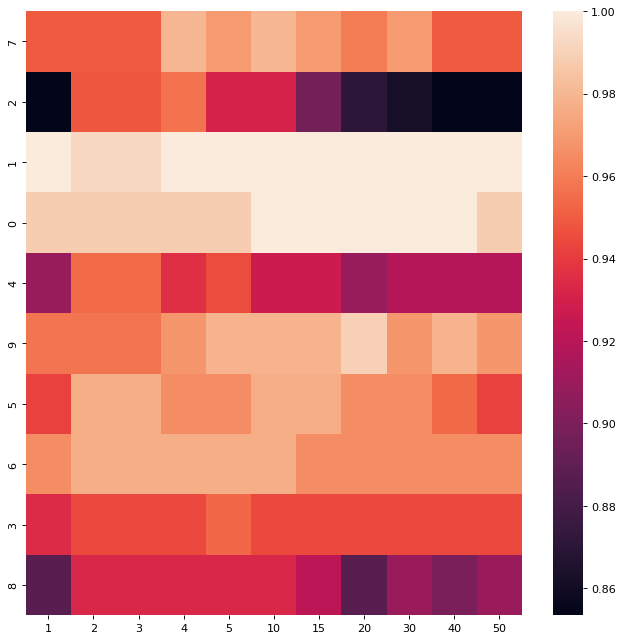

In [9]:
plt.figure(dpi= 80, figsize= (10,10))
#Key of this dict is K value that is specified in task 3
#Its items are dicts with digits and corresponding accuracy
finalK_Result = {}


for key_K, valueDict in dictonaryOfY_pred.items():
    differenceDF = pd.DataFrame(list(zip(y_test, y_pred)), columns= ["y_test", "y_pred"])
    accuracyResults = {}
    y_pred = valueDict["y_pred"]

    for i in (differenceDF["y_test"].unique()):
        signleDigit = differenceDF[differenceDF["y_test"] == i]
        accuracyResults[i] = calculateAccuracy(signleDigit["y_test"], signleDigit["y_pred"])

    finalK_Result[key_K] = accuracyResults
    # keys  = list(accuracyResults.keys())
    # vals = [float(accuracyResults[k]) for k in keys]
finalK_Result = pd.DataFrame.from_dict(finalK_Result)
finalK_Result
sns.heatmap(data = finalK_Result)
# superBarplot = sns.barplot(x = keys, y = vals)
# superBarplot.set_xlabel("digit")
# superBarplot.set_ylabel("Accuracy")
# plt.show()


In [ ]:
finalK_Result